<a href="https://colab.research.google.com/github/ABDULRAHEEM77/Deep-Learning/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
from tensorflow.keras.datasets import california_housing

In [5]:
import tensorflow as tf

In [6]:
# Version
print(tf.__version__)
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

2.19.0
2.0.2
2.2.2
0.13.2


In [7]:
from sklearn.datasets import fetch_california_housing

In [8]:
housing = fetch_california_housing()

In [9]:
x = housing["data"]
y = housing["target"]

In [10]:
from sklearn.model_selection import train_test_split

In [ ]:
random_state = 42

In [ ]:
x_train, x_other, y_train, y_other = train_test_split(x, y, test_size=0.3, random_state=random_state)

In [ ]:
x_valid, x_test, y_valid, y_test = train_test_split(x_other, y_other, test_size=0.5, random_state=random_state)

In [ ]:
x_train.shape, x_valid.shape, x_test.shape

((14448, 8), (3096, 8), (3096, 8))

In [ ]:
# Whenever making the model run this command
np.random.seed(42)
tf.random.set_seed(42)
tf.keras.backend.clear_session()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# import tensarflow
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD

In [ ]:
# Creating the model
# As this is the regression problem so we don't need an activatio function
model = Sequential(
     [
     layers.Input(shape=x_train.shape[1:], name = "input_layer"),
     layers.Dense(30, activation="relu", name = "hidden_layer_1"),
     layers.Dense(1, name = "output_layer")
     ]
)

In [ ]:
# First Dense LAyers = 30 * 8 connection weights + 30 bias values
# (30*8) + 30 = 270m parameters
# Output Layer = (30*1) + 1 = 31
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.utils import plot_model

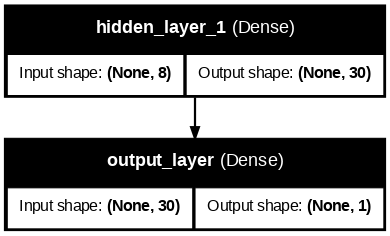

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, dpi=80)

# **Traning Our Model**

In [ ]:
# Training the Model
# 1 epoch means and 1 iteration
model.compile(loss="mean_squared_error", optimizer=SGD(learning_rate=1e-3))

In [ ]:
history = model.fit(x_train_scaled, y_train, epochs=20, validation_data=(x_valid_scaled, y_valid))

Epoch 1/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3.1449 - val_loss: 0.8388
Epoch 2/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7885 - val_loss: 0.7273
Epoch 3/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7066 - val_loss: 0.6834
Epoch 4/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6682 - val_loss: 0.6504
Epoch 5/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6381 - val_loss: 0.6232
Epoch 6/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6130 - val_loss: 0.6003
Epoch 7/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5915 - val_loss: 0.5811
Epoch 8/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5731 - val_loss: 0.5648
Epoch 9/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5573 - val_loss: 0.5507
Epoch 10/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5438 - val_loss: 0.5388
Epoch 11/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5322 - val_loss: 0.5285
Epoch 12/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [ ]:
# printing results
results = model.evaluate(x_test_scaled, y_test)
mse = results
rmse = np.sqrt(mse)
print(f"MSE Test: {mse}")
print(f"RMSE Test: {rmse}")


97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4567
MSE Test: 0.4393433928489685
RMSE Test: 0.6628298370237783


In [ ]:
import time

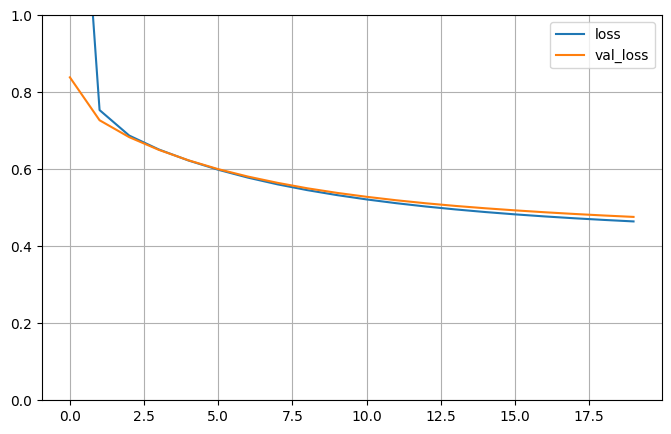

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model = Sequential(
    [
    layers.Input(shape=[x_train_scaled.shape[1]], name = "Input_Layer"),
    layers.Dense(50, activation="relu", name = "Hidden_Layer_1"),
    layers.Dense(100, activation="relu", name = "Hidden_Layer_2"),
    layers.Dense(100, activation="relu", name = "Hidden_Layer_3"),
    layers.Dense(1, name = "Output_Layer")
    ]
)


In [ ]:
model.compile(loss="mean_squared_error", optimizer=SGD(learning_rate=1e-3))

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)          │ (None, 50)             │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_2 (Dense)          │ (None, 100)            │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_3 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,751 (61.53 KB)

 Trainable params: 15,751 (61.53 KB)

 Non-trainable params: 0 (0.00 B)

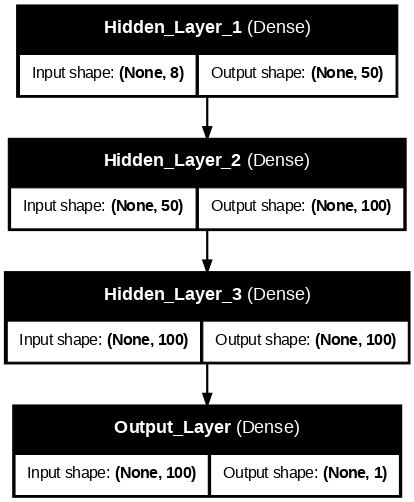

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file = "model.png", show_shapes=True, show_layer_names = True, dpi = 80)

In [ ]:
import time
start_time = time.time()
model.compile(loss = "mean_squared_error", optimizer=SGD(learning_rate=1e-3))
end_time = time.time()
print(end_time-start_time)
history = model.fit(x_train_scaled, y_train, epochs=20, validation_data=(x_valid_scaled, y_valid))

0.006768465042114258
Epoch 1/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.3601 - val_loss: 0.7244
Epoch 2/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7051 - val_loss: 0.6442
Epoch 3/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6340 - val_loss: 0.5951
Epoch 4/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5886 - val_loss: 0.5588
Epoch 5/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5547 - val_loss: 0.5310
Epoch 6/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5285 - val_loss: 0.5092
Epoch 7/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5080 - val_loss: 0.4923
Epoch 8/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4919 - val_loss: 0.4786
Epoch 9/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4788 - val_loss: 0.4675
Epoch 10/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4681 - val_loss: 0.4587
Epoch 11/20
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4593 - val_loss: 0.4515
Epoch 12/20
452/452 ━━━━━━━━━━━

In [ ]:
results = model.evaluate(x_test_scaled, y_test)
mse = results
rmse = np.sqrt(mse)
print(f"MSE Test: {mse}")
print(f"RMSE Test: {rmse}")


97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4012
MSE Test: 0.3844262361526489
RMSE Test: 0.6200211578266092


In [ ]:
x_new = x_test_scaled[:5]
y_pred = model.predict(x_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


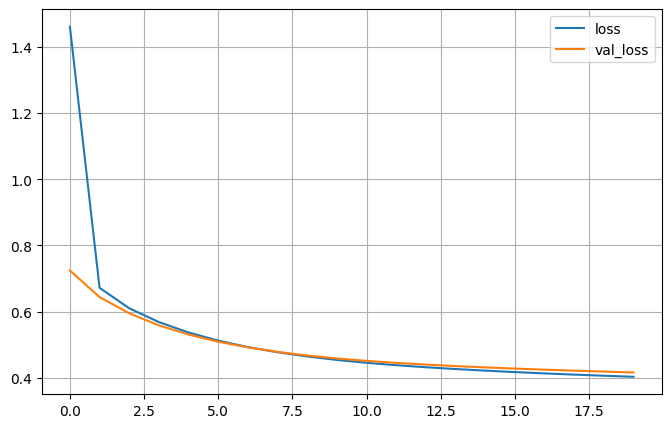

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [ ]:
# Gradient Descent
'''
it's role is to reduce the error .
It repeatedly take smal steps in the direction of the gradient to find a new minimum value
'''


"\nit's role is to reduce the error .\nIt repeatedly take smal steps in the direction of the gradient to find a new minimum value\n"

# **Air Quality Dataset**

In [ ]:
from ast import increment_lineno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df = pd.read_csv("AirQualityUCI.csv", sep = ";", decimal = ",")

In [ ]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [ ]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [ ]:
df.sample(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
774,12/04/2004,00.00.00,0.7,840.0,31.0,1.6,556.0,41.0,1474.0,58.0,1094.0,366.0,13.7,38.3,0.5957,NaN,NaN
4625,19/09/2004,11.00.00,2.1,1083.0,-200.0,10.2,984.0,251.0,784.0,115.0,1485.0,1049.0,30.0,28.5,1.1883,NaN,NaN
6214,24/11/2004,16.00.00,3.4,1374.0,-200.0,17.4,1222.0,602.0,516.0,160.0,1582.0,1671.0,13.7,66.8,1.0432,NaN,NaN
6465,05/12/2004,03.00.00,1.0,884.0,-200.0,3.0,651.0,-200.0,1034.0,-200.0,1105.0,741.0,12.2,69.6,0.9860,NaN,NaN
2362,17/06/2004,04.00.00,-200.0,804.0,-200.0,3.3,668.0,32.0,1102.0,51.0,1479.0,753.0,18.8,58.6,1.2581,NaN,NaN
3146,19/07/2004,20.00.00,-200.0,1216.0,-200.0,14.6,1136.0,128.0,658.0,131.0,1737.0,1265.0,31.7,28.1,1.2912,NaN,NaN
1056,23/04/2004,18.00.00,4.8,1557.0,872.0,27.1,1483.0,250.0,615.0,164.0,2087.0,1757.0,24.9,30.8,0.9540,NaN,NaN
4140,30/08/2004,06.00.00,-200.0,1017.0,-200.0,7.6,885.0,-200.0,726.0,-200.0,1609.0,884.0,21.5,64.0,1.6256,NaN,NaN
7134,02/01/2005,00.00.00,1.8,1078.0,-200.0,5.2,775.0,230.0,809.0,112.0,1012.0,1195.0,4.7,62.9,0.5424,NaN,NaN
5830,08/11/2004,16.00.00,2.2,973.0,-200.0,11.2,1023.0,358.0,780.0,132.0,1226.0,964.0,13.1,40.4,0.6060,NaN,NaN


In [ ]:
df.isnull().mean()*100

,0
Date,1.203674
Time,1.203674
CO(GT),1.203674
PT08.S1(CO),1.203674
NMHC(GT),1.203674
C6H6(GT),1.203674
PT08.S2(NMHC),1.203674
NOx(GT),1.203674
PT08.S3(NOx),1.203674
NO2(GT),1.203674


In [ ]:
df.isnull().sum()

,0
Date,114
Time,114
CO(GT),114
PT08.S1(CO),114
NMHC(GT),114
C6H6(GT),114
PT08.S2(NMHC),114
NOx(GT),114
PT08.S3(NOx),114
NO2(GT),114


In [ ]:
df.drop(["Unnamed: 15", "Unnamed: 16"], axis=1, inplace=True)

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [ ]:
df.columns[2:]

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

In [ ]:
# Traget Variable "CO(GT)"
# Rest are input

In [ ]:
# Inputs
X = df.drop(columns=["CO(GT)"])

In [ ]:
# Target Variables
y = df["CO(GT)"]

# **Develop a deep neural network with the following layrs**
1. Input layers
2. 5 Hidden Layers each contaning 100,200,300, 400,500 neurons respectively
3. Output Layer
4. Optimizer SGD, Adam
5. epochs should be 100 and batch size should be 128
6. Loss MSE, RMMSE
7. Tell which optimizer is having the lowest testing rmse using sgd and adam?

you guys have 30 mins to perform given task

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import StandardScaler

In [ ]:
# Whenever making the model run this command
np.random.seed(42)
tf.random.set_seed(42)
tf.keras.backend.clear_session()

In [ ]:
random_state = 42

In [ ]:
X_train, X_other, y_train, y_other = train_test_split(x, y, test_size=0.3, random_state=random_state)

NameError: name 'x' is not defined

In [ ]:
x_valid, x_test, y_valid, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=random_state)